In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import torch
import os
import PIL
from PIL import Image
import tensorflow as tf
# from tensorflow import keras


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-13 22:02:30.312186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# List all physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    print(f"Number of GPUs available: {len(gpus)}")
    for gpu in gpus:
        print("Name:", gpu.name, "Type:", gpu.device_type)
else:
    print("CUDA is not available. TensorFlow will run on CPU.")

CUDA is not available. TensorFlow will run on CPU.


In [28]:
Classes = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "K",
    10: "L",
    11: "M",
    12: "N",
    13: "O",
    14: "P",
    15: "Q",
    16: "R",
    17: "S",
    18: "T",
    19: "U",
    20: "V",
    21: "W",
    22: "X",
    23: "Y",
}

In [4]:
dataset_path=os.getcwd()+"/data_capture"
print(dataset_path)

img_height,img_width=200,200
batch_size=32

/Users/shobhitsingh/Desktop/ML2/FinalProject/Sign_Language_Interpreter_CNN/data_capture


In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 120000 files belonging to 24 classes.
Using 96000 files for training.
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9']


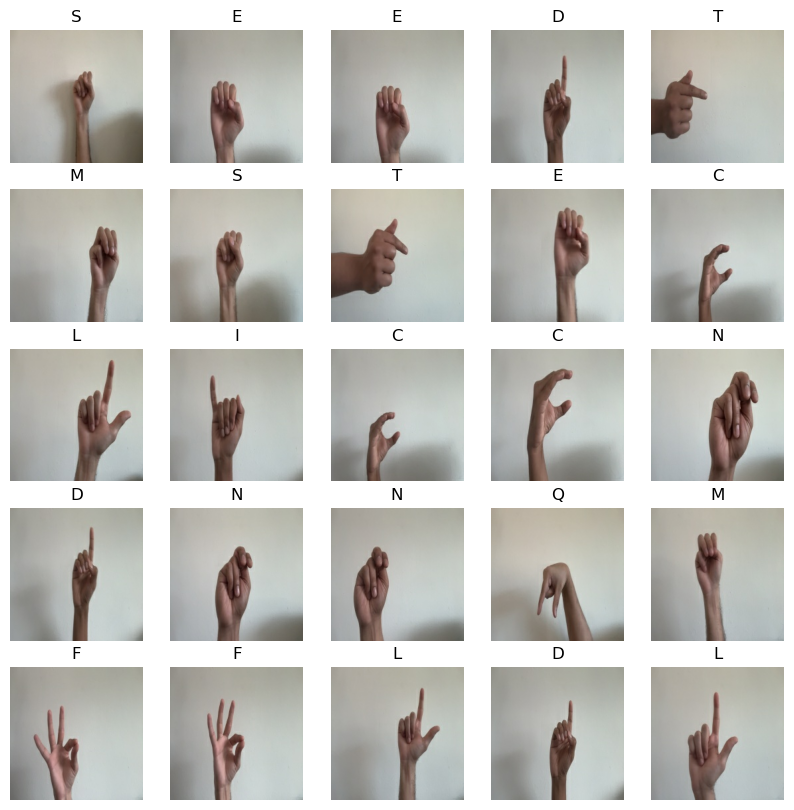

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # print(int(class_names[labels[i]]))
    # print(Classes[int(class_names[labels[i]])])
    plt.title(Classes[int(class_names[labels[i]])])
    plt.axis("off")

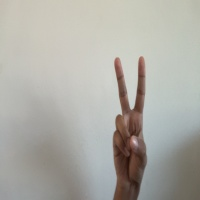

In [30]:
from pathlib import Path
sign = list(Path(dataset_path).glob('20/*'))
PIL.Image.open(str(sign[4]))

(1, 200, 200, 3)


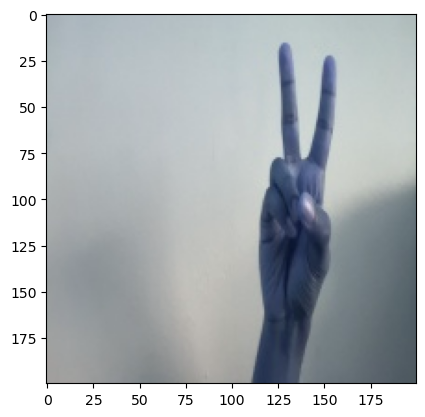

In [31]:
import cv2
image=cv2.imread(str(sign[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
# print(image)
plt.imshow(image[0])

In [ ]:
print(image.shape)
print(type(image))
l=[]
l.append(image[0])
l=np.array(l)
print(l.shape)

In [32]:
import keras
resnet_model = keras.models.load_model('./model.keras')
resnet_model.summary()
class_names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 29)                14877     
                                                                 
Total params: 24651677 (94.04 MB)
Trainable params: 1063965 (4.06 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [33]:
pred=resnet_model.predict(image)
print(pred)
output_class=Classes[np.argmax(pred)]
print("The predicted class is", output_class)

In [ ]:
import cv2
import numpy as np


stream="                                        "
sure="             "
check=[0]*10
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 640)
while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    H, W, _ = frame.shape
    frame_rgb = cv2.resize(frame, (200, 200), interpolation=cv2.INTER_AREA)
    frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)
    frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_GRAY2RGB)
    print(H,W)
    print(frame_rgb.shape)
    # print(frame_rgb)
    l=[]
    l.append(frame_rgb)
    frame_rgb=np.array(l)
    print(frame_rgb.shape)
    # plt.imshow(frame_rgb[0])
    
    prediction = resnet_model.predict(frame_rgb)
    print(prediction)
    predicted_character = class_names[np.argmax(prediction)]
    # print(predicted_character)
    stream=stream[1:]+predicted_character
    check.pop(0)
    check.append(predicted_character)
    if len(set(check))==1:
        sure=sure[1:]+predicted_character



    cv2.putText(frame, predicted_character, (200,200), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 3)

    cv2.putText(frame, stream, (200,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(frame, sure, (200,600), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.imshow('frame', frame)
    cv2.waitKey(1)


cap.release()
cv2.destroyAllWindows()